HW 1-1 (SIMULATION OF FUNCTIONS)


I HAVE USED 2 FUNCTIONS AND 3 MODELS

In [2]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/ea/ea/4ab009e953bca6ff35ad75b8ab58c0923308636c182c145dc63084f7d136/torch-2.4.1-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torch-2.4.1-cp311-cp311-manylinux1_x86_64.whl.metadata (26 kB)
  Obtaining dependency information for nvidia-cuda-cupti-cu12==12.1.105 from https://files.pythonhosted.org/packages/7e/00/6b218edd739ecfc60524e585ba8e6b00554dd908de2c9c66c1af3e44e18d/nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Obtaining dependency information for nvidia-cudnn-cu12==9.1.0.70 from https://files.pythonhosted.org/packages/9f/fd/713452cd72343f682b1c7b9321e23829f00b842ceaedcda96e742ea0b0b3/nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata
  Using cached nvidia_cudnn_cu1

In [4]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/28/9d/40d1b943bbbd02a30d6b4f691d6de37a7e4c92f90bed0f8f47379e90eec6/torchvision-0.19.1-cp311-cp311-manylinux1_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 24.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import torchvision.transforms as T
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import math

In [2]:
torch.manual_seed(1)

In [3]:
torch.manual_seed(1)

(300, 1)
(300, 1)


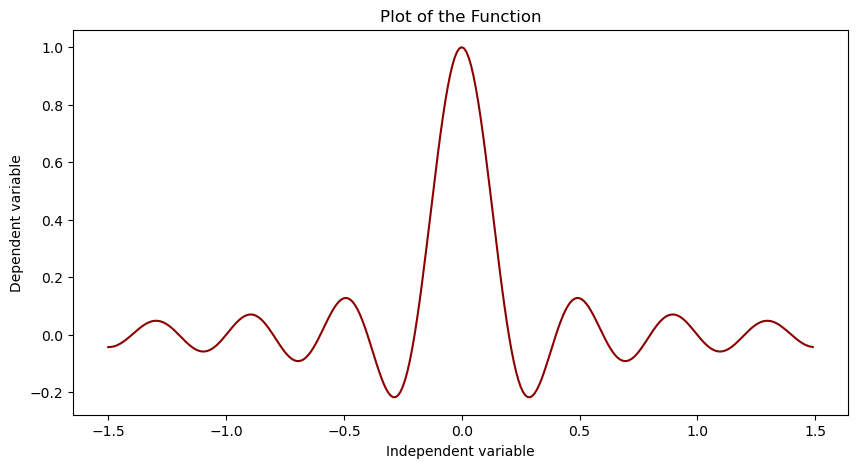

In [4]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)
print(x.shape)
y = (np.sin(5*np.pi*x))/(5*np.pi*x)
print(y.shape)
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,5))
plt.plot(x, y, color = "darkred")
plt.title('Plot of the Function')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [5]:
def train_model(model, x, y):
    max_epoch = 20000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        if epoch % 500 == 0:
           print(f'Current Epoch: {epoch}')
           print(f'Current Loss: {loss.item():.4f}')
           print()


        if epoch == max_epoch:
                print("Max epoch reached without convergence")
                not_converged = False

        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_arr[-1])
                not_converged = False

    return epoch_arr, loss_arr, prediction

In [6]:
# Define model layers
layers = [
    nn.Linear(1, 5), nn.LeakyReLU(),
    nn.Linear(5, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 5), nn.LeakyReLU(),
    nn.Linear(5, 1)
]

# Create model instance using nn.Sequential
model_1 = nn.Sequential(*layers)

# Training setup
optimizer = optim.RMSprop(model_1.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func = nn.MSELoss()

# Print total parameters
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)

# Train the model
m1_epoch_arr, m1_loss_arr, m1_prediction = train_model(model_1, x, y)


571
Current Epoch: 500
Current Loss: 0.0050

Current Epoch: 1000
Current Loss: 0.0028

Current Epoch: 1500
Current Loss: 0.0024

Current Epoch: 2000
Current Loss: 0.0025

Current Epoch: 2500
Current Loss: 0.0024

Current Epoch: 3000
Current Loss: 0.0023

Current Epoch: 3500
Current Loss: 0.0023

Current Epoch: 4000
Current Loss: 0.0024

Current Epoch: 4500
Current Loss: 0.0024

Current Epoch: 5000
Current Loss: 0.0022

Current Epoch: 5500
Current Loss: 0.0024

Current Epoch: 6000
Current Loss: 0.0020

Current Epoch: 6500
Current Loss: 0.0020

Current Epoch: 7000
Current Loss: 0.0019

Current Epoch: 7500
Current Loss: 0.0017

Current Epoch: 8000
Current Loss: 0.0019

Current Epoch: 8500
Current Loss: 0.0021

Current Epoch: 9000
Current Loss: 0.0016

Current Epoch: 9500
Current Loss: 0.0016

Current Epoch: 10000
Current Loss: 0.0015

Current Epoch: 10500
Current Loss: 0.0017

Current Epoch: 11000
Current Loss: 0.0019

Current Epoch: 11500
Current Loss: 0.0014

Current Epoch: 12000
Curren

In [7]:
# Define model layers
layers_model_2 = [
    nn.Linear(1, 10), nn.LeakyReLU(),
    nn.Linear(10, 18), nn.LeakyReLU(),
    nn.Linear(18, 15), nn.LeakyReLU(),
    nn.Linear(15, 4), nn.LeakyReLU(),
    nn.Linear(4, 1)
]

# Create model instance using nn.Sequential
model_2 = nn.Sequential(*layers_model_2)

# Training setup
optimizer = optim.RMSprop(model_2.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func = nn.MSELoss()

# Print total parameters
pytorch_total_params = sum(p.numel() for p in model_2.parameters())
print(pytorch_total_params)

# Train the model
m2_epoch_arr, m2_loss_arr, m2_prediction = train_model(model_2, x, y)


572
Current Epoch: 500
Current Loss: 0.0040

Current Epoch: 1000
Current Loss: 0.0026

Current Epoch: 1500
Current Loss: 0.0022

Current Epoch: 2000
Current Loss: 0.0017

Current Epoch: 2500
Current Loss: 0.0014

Current Epoch: 3000
Current Loss: 0.0014

Current Epoch: 3500
Current Loss: 0.0012

Current Epoch: 4000
Current Loss: 0.0013

Current Epoch: 4500
Current Loss: 0.0013

Current Epoch: 5000
Current Loss: 0.0011

Convergence reached for loss: 0.0009986248


In [8]:
# Define model layers
layers_model_3 = [
    nn.Linear(1, 190), nn.LeakyReLU(),
    nn.Linear(190, 1)
]

# Create model instance using nn.Sequential
model_3 = nn.Sequential(*layers_model_3)

# Training setup
optimizer = optim.RMSprop(model_3.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func = nn.MSELoss()

# Print total parameters
pytorch_total_params = sum(p.numel() for p in model_3.parameters())
print(pytorch_total_params)

# Train the model
m3_epoch_arr, m3_loss_arr, m3_prediction = train_model(model_3, x, y)



571
Current Epoch: 500
Current Loss: 0.0308

Current Epoch: 1000
Current Loss: 0.0220

Current Epoch: 1500
Current Loss: 0.0169

Current Epoch: 2000
Current Loss: 0.0138

Current Epoch: 2500
Current Loss: 0.0116

Current Epoch: 3000
Current Loss: 0.0101

Current Epoch: 3500
Current Loss: 0.0090

Current Epoch: 4000
Current Loss: 0.0082

Current Epoch: 4500
Current Loss: 0.0076

Current Epoch: 5000
Current Loss: 0.0071

Current Epoch: 5500
Current Loss: 0.0068

Current Epoch: 6000
Current Loss: 0.0065

Current Epoch: 6500
Current Loss: 0.0062

Current Epoch: 7000
Current Loss: 0.0060

Current Epoch: 7500
Current Loss: 0.0059

Current Epoch: 8000
Current Loss: 0.0057

Current Epoch: 8500
Current Loss: 0.0056

Current Epoch: 9000
Current Loss: 0.0054

Current Epoch: 9500
Current Loss: 0.0053

Current Epoch: 10000
Current Loss: 0.0053

Current Epoch: 10500
Current Loss: 0.0052

Current Epoch: 11000
Current Loss: 0.0050

Current Epoch: 11500
Current Loss: 0.0049

Current Epoch: 12000
Curren

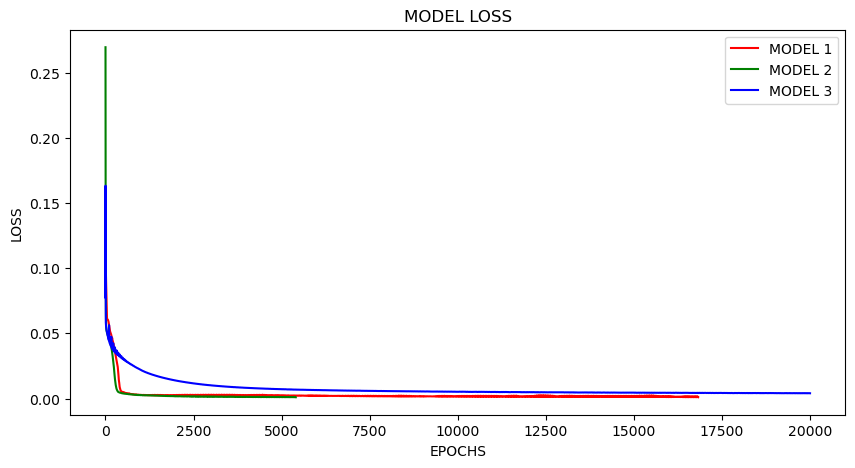

In [9]:
plt.figure(figsize=(10,5))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "red", label ="MODEL 1")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "green", label ="MODEL 2")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "blue", label ="MODEL 3")
plt.title('MODEL LOSS')
plt.legend(loc='upper right')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()

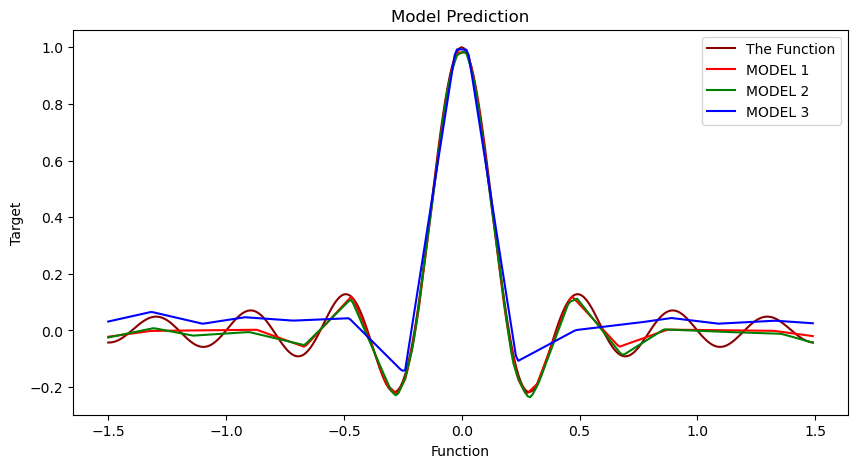

In [10]:
plt.figure(figsize=(10,5))
plt.plot(x, y, color="darkred", label = 'The Function')
plt.plot(x, m1_prediction.data, color="red", label = 'MODEL 1')
plt.plot(x, m2_prediction.data, color="green", label = 'MODEL 2')
plt.plot(x, m3_prediction.data, color="blue", label = 'MODEL 3')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend(loc='upper right')
plt.show()

In [11]:
torch.manual_seed(1)

(300, 1)
(300, 1)


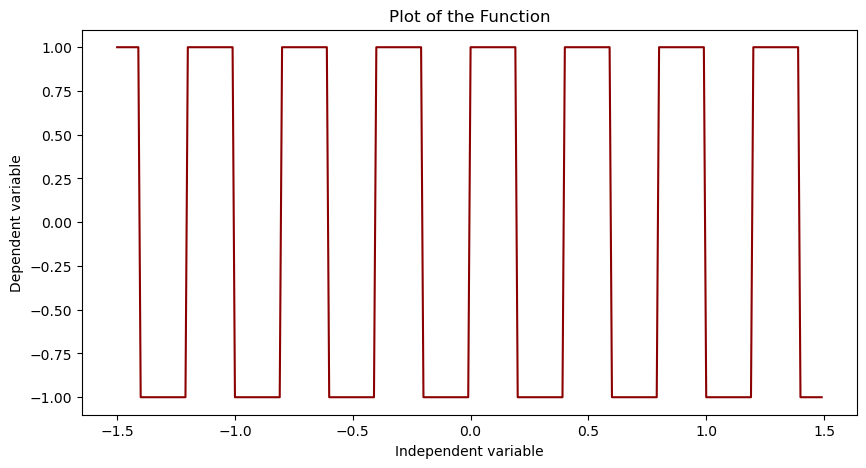

In [12]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
print(x.shape)
y = np.sign(np.sin(5*np.pi*x))
print(y.shape)
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,5))
plt.plot(x, y, color = "darkred")

plt.title('Plot of the Function')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [13]:
# Define model layers
layers_model_4 = [
    nn.Linear(1, 5), nn.LeakyReLU(),
    nn.Linear(5, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 5), nn.LeakyReLU(),
    nn.Linear(5, 1)
]

# Create model instance using nn.Sequential
model_4 = nn.Sequential(*layers_model_4)

optimizer = optim.Adam(model_4.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func = nn.MSELoss()

# Print total parameters
pytorch_total_params = sum(p.numel() for p in model_4.parameters())
print(pytorch_total_params)

# Train the model
m1_epoch_arr, m1_loss_arr, m1_prediction = train_model(model_4, x, y)




571
Current Epoch: 500
Current Loss: 0.9994

Current Epoch: 1000
Current Loss: 0.6923

Current Epoch: 1500
Current Loss: 0.2504

Current Epoch: 2000
Current Loss: 0.1324

Current Epoch: 2500
Current Loss: 0.1039

Current Epoch: 3000
Current Loss: 0.0906

Current Epoch: 3500
Current Loss: 0.0820

Current Epoch: 4000
Current Loss: 0.0733

Current Epoch: 4500
Current Loss: 0.0687

Current Epoch: 5000
Current Loss: 0.0596

Current Epoch: 5500
Current Loss: 0.0531

Current Epoch: 6000
Current Loss: 0.0482

Current Epoch: 6500
Current Loss: 0.0474

Current Epoch: 7000
Current Loss: 0.0382

Current Epoch: 7500
Current Loss: 0.0342

Current Epoch: 8000
Current Loss: 0.0310

Current Epoch: 8500
Current Loss: 0.0278

Current Epoch: 9000
Current Loss: 0.0247

Current Epoch: 9500
Current Loss: 0.0219

Current Epoch: 10000
Current Loss: 0.0200

Current Epoch: 10500
Current Loss: 0.0239

Current Epoch: 11000
Current Loss: 0.0163

Current Epoch: 11500
Current Loss: 0.0168

Current Epoch: 12000
Curren

In [14]:
# Define model layers
layers_model_5 = [
    nn.Linear(1, 10), nn.LeakyReLU(),
    nn.Linear(10, 18), nn.LeakyReLU(),
    nn.Linear(18, 15), nn.LeakyReLU(),
    nn.Linear(15, 4), nn.LeakyReLU(),
    nn.Linear(4, 1)
]

# Create model instance using nn.Sequential with nn.LeakyReLU modules
model_5 = nn.Sequential(*layers_model_5)

optimizer = optim.Adam(model_5.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func = nn.MSELoss()

# Print total parameters
pytorch_total_params = sum(p.numel() for p in model_5.parameters())
print(pytorch_total_params)

# Train the model
m2_epoch_arr, m2_loss_arr, m2_prediction = train_model(model_5, x, y)


572
Current Epoch: 500
Current Loss: 0.9944

Current Epoch: 1000
Current Loss: 0.6939

Current Epoch: 1500
Current Loss: 0.4578

Current Epoch: 2000
Current Loss: 0.3447

Current Epoch: 2500
Current Loss: 0.3014

Current Epoch: 3000
Current Loss: 0.2799

Current Epoch: 3500
Current Loss: 0.2650

Current Epoch: 4000
Current Loss: 0.2504

Current Epoch: 4500
Current Loss: 0.2325

Current Epoch: 5000
Current Loss: 0.1920

Current Epoch: 5500
Current Loss: 0.1654

Current Epoch: 6000
Current Loss: 0.1587

Current Epoch: 6500
Current Loss: 0.1531

Current Epoch: 7000
Current Loss: 0.1454

Current Epoch: 7500
Current Loss: 0.1429

Current Epoch: 8000
Current Loss: 0.1410

Current Epoch: 8500
Current Loss: 0.1382

Current Epoch: 9000
Current Loss: 0.1346

Current Epoch: 9500
Current Loss: 0.1300

Current Epoch: 10000
Current Loss: 0.1280

Current Epoch: 10500
Current Loss: 0.1278

Current Epoch: 11000
Current Loss: 0.1284

Current Epoch: 11500
Current Loss: 0.1281

Current Epoch: 12000
Curren

In [15]:
# Define model layers
layers_model_6 = [
    nn.Linear(1, 189), nn.LeakyReLU(),
    nn.Linear(189, 1)
]

# Create model instance using nn.Sequential
model_6 = nn.Sequential(*layers_model_6)

optimizer = optim.Adam(model_6.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func = nn.MSELoss()

# Print total parameters
pytorch_total_params = sum(p.numel() for p in model_6.parameters())
print(pytorch_total_params)

# Train the model
m3_epoch_arr, m3_loss_arr, m3_prediction = train_model(model_6, x, y)


568
Current Epoch: 500
Current Loss: 0.8765

Current Epoch: 1000
Current Loss: 0.6697

Current Epoch: 1500
Current Loss: 0.5106

Current Epoch: 2000
Current Loss: 0.4022

Current Epoch: 2500
Current Loss: 0.3352

Current Epoch: 3000
Current Loss: 0.2955

Current Epoch: 3500
Current Loss: 0.2716

Current Epoch: 4000
Current Loss: 0.2562

Current Epoch: 4500
Current Loss: 0.2453

Current Epoch: 5000
Current Loss: 0.2368

Current Epoch: 5500
Current Loss: 0.2299

Current Epoch: 6000
Current Loss: 0.2240

Current Epoch: 6500
Current Loss: 0.2185

Current Epoch: 7000
Current Loss: 0.2148

Current Epoch: 7500
Current Loss: 0.2118

Current Epoch: 8000
Current Loss: 0.2094

Current Epoch: 8500
Current Loss: 0.2074

Current Epoch: 9000
Current Loss: 0.2057

Current Epoch: 9500
Current Loss: 0.2036

Current Epoch: 10000
Current Loss: 0.2020

Current Epoch: 10500
Current Loss: 0.2007

Current Epoch: 11000
Current Loss: 0.1995

Current Epoch: 11500
Current Loss: 0.1984

Current Epoch: 12000
Curren

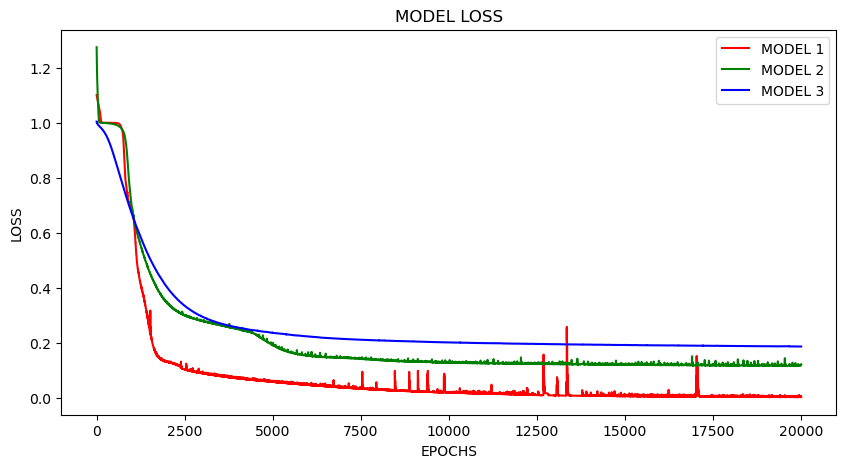

In [16]:
plt.figure(figsize=(10,5))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "red", label = "MODEL 1")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "green", label = "MODEL 2")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "blue", label = "MODEL 3")
plt.title('MODEL LOSS')
plt.legend(loc='upper right')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()

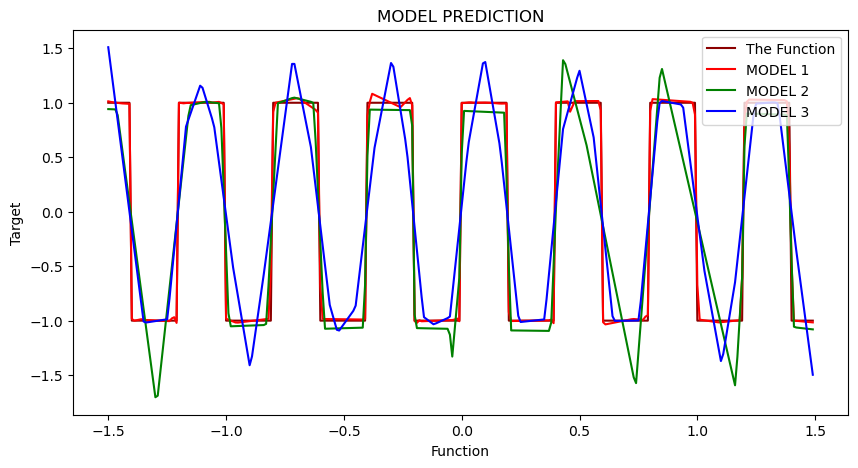

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, color="darkred", label='The Function')
plt.plot(x, m1_prediction.data, color="red", label='MODEL 1')
plt.plot(x, m2_prediction.data, color="green", label='MODEL 2')
plt.plot(x, m3_prediction.data, color="blue", label='MODEL 3')
plt.title('MODEL PREDICTION')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend(loc='upper right')
plt.show()


HW 1-1 Train on an actual task

i have used 3 CNN models

In [18]:
# Load and preprocess MNIST dataset
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=600, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=100, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34061644.37it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2237163.53it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 17739286.36it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5383025.93it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [19]:
def train_net(net, num_epochs):
    net.train()
    total_steps = len(train_loader)
    losses = []
    epochs = []
    accuracies = []
    converged = True
    epoch = 0
    avg_loss_arr = []

    while converged:
        epoch += 1
        correct = 0
        samples = 0
        loss_sum = 0

        for i, (images, labels) in enumerate(train_loader):
            predictions = net(images)
            loss = loss_function(predictions, labels)
            loss_sum += loss.detach().numpy()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(predictions.data, 1)
            samples += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc = 100.0 * correct / samples

            if (i+1) % 100 == 0:
                print(f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}', end='\r', flush=True)
                epochs.append(epoch)
                losses.append(loss.item())
                print(f'Epoch [{epoch}/{num_epochs}], Accuracy : {acc} %', end='\r', flush=True)
                accuracies.append(acc)

                if epoch == num_epochs:
                    print(f"Max Epoch Reached, Loss: {loss.item():.4f}, Accuracy:{acc:2f}%")
                    converged = False
                elif (epoch > 5) and (losses[-1] < 0.001):
                    if abs(losses[-3] - losses[-2]) < 1.0e-05 and abs(losses[-2] - losses[-1]) < 1.0e-05:
                        print("Convergence reached for loss:", losses[-1])
                        converged = False

        avg_loss_arr.append(loss_sum / (i + 1))

    return epochs, losses, accuracies, avg_loss_arr

In [20]:
input_size = 784
max_epochs = 20
learning_rate = 0.001
kernel_size = 4
weight_decay_val = 1e-4
dropout = 0.25

In [21]:
# Define the first ConvNet
class ConvNet1(nn.Module):
    def __init__(self):
        super(ConvNet1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, kernel_size)
        self.fc1 = nn.Linear(320, 50)
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the first ConvNet instance
convnet1 = ConvNet1()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(convnet1.parameters(), lr=learning_rate, weight_decay=weight_decay_val)

# Train the first ConvNet
epoch_arr1, losses_arr1, accuracy_arr1, avg_loss_arr1 = train_net(convnet1, max_epochs)

Max Epoch Reached, Loss: 0.0635, Accuracy:98.138333%


In [22]:
# Define the second ConvNet
class ConvNet2(nn.Module):
    def __init__(self):
        super(ConvNet2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, kernel_size)
        self.fc1 = nn.Linear(20 * kernel_size * kernel_size, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 40)
        self.fc4 = nn.Linear(40, 30)
        self.fc5 = nn.Linear(30, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Create the second ConvNet instance
convnet2 = ConvNet2()
optimizer = torch.optim.Adam(convnet2.parameters(), lr=learning_rate, weight_decay=weight_decay_val)

# Train the second ConvNet
epoch_arr2, losses_arr2, accuracy_arr2, avg_loss_arr2 = train_net(convnet2, max_epochs)

Max Epoch Reached, Loss: 0.0932, Accuracy:98.295000%


In [23]:
# Define the third ConvNet
class ConvNet3(nn.Module):
    def __init__(self):
        super(ConvNet3, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 15, 5)
        self.fc1 = nn.Linear(15 * 4 * 4, 86)
        self.fc2 = nn.Linear(86, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 15 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create the third ConvNet instance
convnet3 = ConvNet3()
optimizer = torch.optim.Adam(convnet3.parameters(), lr=learning_rate, weight_decay=weight_decay_val)

# Train the third ConvNet
epoch_arr3, losses_arr3, accuracy_arr3, avg_loss_arr3 = train_net(convnet3, max_epochs)

Max Epoch Reached, Loss: 0.0353, Accuracy:99.108333%


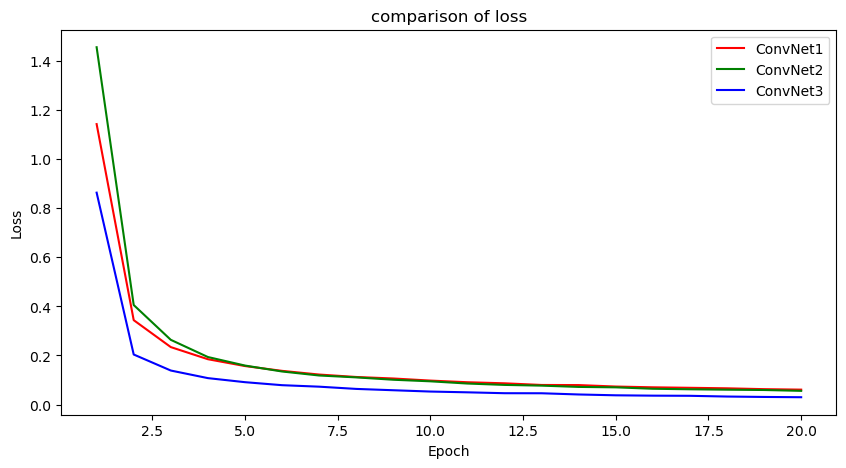

In [24]:
# Plot for loss comparison
plt.figure(figsize=(10, 5))
plt.plot(epoch_arr1, avg_loss_arr1, color="red", label="ConvNet1")
plt.plot(epoch_arr2, avg_loss_arr2, color="green", label="ConvNet2")
plt.plot(epoch_arr3, avg_loss_arr3, color="blue", label="ConvNet3")
plt.title('comparison of loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

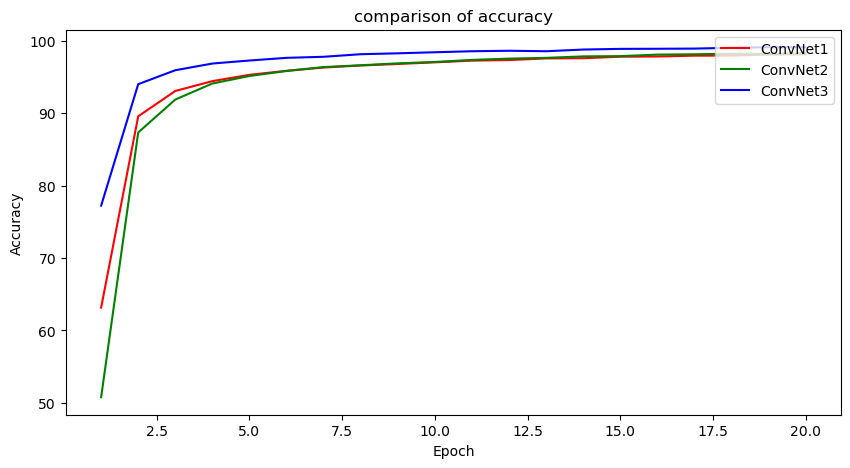

In [25]:
# Plot for accuracy comparison
plt.figure(figsize=(10, 5))
plt.plot(epoch_arr1, accuracy_arr1, color="red", label="ConvNet1")
plt.plot(epoch_arr2, accuracy_arr2, color="green", label="ConvNet2")
plt.plot(epoch_arr3, accuracy_arr3, color="blue", label="ConvNet3")
plt.title('comparison of accuracy')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()